# Financial Planning Activity

In [3]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [4]:
#load env
load_dotenv()

True

### Create a pie chart for our liquid assets

In [5]:
# Assumption: we our crypto coins: litecoin and tezos
my_lc = 100
my_tz = 500

In [6]:
# Crypto APIs
lc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
tz_url = "https://api.alternative.me/v2/ticker/Tezos/?convert=USD"

In [7]:
#get prices
lc_reponse = requests.get(lc_url).json()
lc_price = lc_reponse['data']['2']['quotes']['USD']['price']

tz_reponse = requests.get(tz_url).json()
tz_price = tz_reponse['data']['2011']['quotes']['USD']['price']

#get currnet value of "my cryptos"
my_lc_value = my_lc * lc_price
my_tz_value = my_tz * tz_price

#Print output on crypto wallet
print(f"My Litecoin balance is ${my_lc_value}")
print(f"My Tezos balance is ${my_tz_value}")

My Litecoin balance is $8504.0
My Tezos balance is $1150.0


In [8]:
# Assumption: our stocks, AMAT and ORCL
my_ORCL = 100
my_AMAT = 100

In [9]:
# Set Alpaca API key and secret
#alpaca_api_key = "PKC15QNA0N6V3XUMQKFD"
#alpaca_secret_key = "m3LroXDXJLmVTvjVXzM0yEfk4d2x9y99qIFlaUF7"

#alpaca_api_key = str(alpaca_api_key) 
#alpaca_secret_key = str(alpaca_secret_key)
# Create the Alpaca API object

#alpaca = tradeapi.REST(
   # alpaca_api_key,
   # alpaca_secret_key,
   # api_version="v2")

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = str(alpaca_api_key) 
alpaca_secret_key = str(alpaca_secret_key)
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [11]:
alpaca_api_key

'PKC15QNA0N6V3XUMQKFD'

In [12]:
alpaca_secret_key

'm3LroXDXJLmVTvjVXzM0yEfk4d2x9y99qIFlaUF7'

In [21]:
from datetime import datetime
startdate = datetime.fromisoformat('2020-11-20')

#iso foramt
today = pd.Timestamp(startdate, tz="America/New_York").isoformat()

#set tickers
tickers = ['ORCL','AMAT']

#timeframe
timeframe = '1D'

#get closing prices
df_investments = alpaca.get_barset(tickers, timeframe, start = today).df

#take a peek
df_investments.head()

AMAT                                 ORCL         \
                           open   high    low  close   volume   open   high   
2020-11-20 00:00:00-05:00  77.2  78.57  76.68  76.72  6733058  56.36  56.44   

                                                  
                             low close    volume  
2020-11-20 00:00:00-05:00  55.68  55.7  13763956

In [22]:
#Getting closing prices
ORCL_close_price = round(df_investments[tickers[0]]['close'][0],2)
AMAT_close_price = round(df_investments[tickers[1]]['close'][0],2)

print("Current price ORCL",ORCL_close_price)
print("Current price AMAT",AMAT_close_price)

Current price ORCL 55.7
Current price AMAT 76.72


In [23]:
#computing total value of stocks
my_ORCL_value = my_ORCL * ORCL_close_price
my_AMAT_value = my_AMAT * AMAT_close_price

#Print output on stocks
print(f"My ORCL ${my_ORCL_value}")
print(f"My AMAT ${my_AMAT_value}")

My ORCL $5570.0
My AMAT $7672.0


## Pie chart for saving analysis

In [24]:
#household income
monthly_income = 60000

#put assets into a list
savings_data = [
    my_lc_value+my_tz_value,
    my_ORCL_value+my_AMAT_value
]

#Create savings dataframe
df_savings = pd.DataFrame(savings_data, columns=['amount'],index=['crypto','shares'])

df_savings

,amount
crypto,9654.0
shares,13242.0


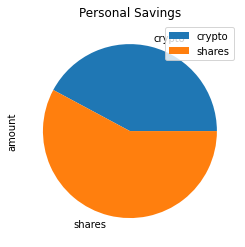

In [25]:
#pie chart viewing for % of savings
df_savings.plot.pie(y='amount',title='Personal Savings')

In [26]:
#Emergency fund
emergency_fund = monthly_income/12 * 3

#calcuate savings
total_savings = float(df_savings.sum())

#check we have enough savings
if total_savings > emergency_fund:
    print("You're responsible!")
elif total_savings == emergency_fund:
    print("You have exactly 3 months saved up")
else:
    print("You need "+str(emergency_fund-total_savings)+" to save more!")

You're responsible!


### Simulations for retirement

In [27]:
#set start and end date for API data
start_date = pd.Timestamp('2017-11-17', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2020-11-17', tz="America/New_York").isoformat()

In [28]:
#get closing prices
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date
).df

df_stock_data.head()

AMAT                                      ORCL  \
                            open     high     low   close    volume   open   
2017-11-17 00:00:00-05:00  60.46  60.8900  56.085  56.480  24615267  49.00   
2017-11-20 00:00:00-05:00  56.66  58.2199  56.660  57.615  11672628  49.04   
2017-11-21 00:00:00-05:00  58.00  58.8600  58.000  58.800   8384406  49.00   
2017-11-22 00:00:00-05:00  58.94  59.0000  57.500  57.680   6323003  48.56   
2017-11-24 00:00:00-05:00  57.85  58.1300  57.670  57.910   3047529  48.88   

                                                           
                            high    low   close    volume  
2017-11-17 00:00:00-05:00  49.23  48.85  48.930   7183726  
2017-11-20 00:00:00-05:00  49.16  48.92  49.020   9863689  
2017-11-21 00:00:00-05:00  49.10  48.50  48.625  14837610  
2017-11-22 00:00:00-05:00  48.83  48.42  48.580   8558419  
2017-11-24 00:00:00-05:00  49.13  48.69  49.005   4717850

In [29]:
#Apply MC Sim for 30 years
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [41]:
#Run the forecast for 30 years
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988586,1.025593,1.005713,0.988579,0.984363,0.986229,1.029132,1.000649,0.963091,1.009272,...,0.993865,0.971746,1.026831,0.992069,1.027957,0.986462,1.008079,0.990229,1.040221,0.989354
2,1.001907,1.053787,1.016956,0.988074,0.967125,0.990417,1.017281,1.017324,0.966086,0.997461,...,1.012409,0.978195,1.009061,0.990829,1.007541,0.985315,1.016053,1.008375,1.047783,1.011242
3,0.994653,1.040403,1.039489,1.001430,0.977105,0.985282,1.017913,1.006865,0.967187,1.016520,...,1.012534,0.959393,1.006778,1.018502,0.983338,0.987112,1.023060,1.018354,1.022759,1.029119
4,0.966408,1.051700,1.036872,1.002262,0.977345,0.966942,1.006544,0.989477,0.939567,1.018942,...,1.009365,0.960168,1.015646,1.022371,1.006452,0.983925,1.017109,1.032588,1.028564,1.026282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.385397,71.517517,64.712346,2.555945,2.138637,5.340766,8.606165,34.779426,17.109713,8.828142,...,23.711908,17.597638,25.507469,65.718037,208.182368,180.506360,9.242302,257.063483,13.417222,110.549784
7557,20.251446,71.490903,63.923522,2.548834,2.113650,5.190528,8.808186,35.688328,17.344668,8.985635,...,24.499975,17.688327,24.732136,66.489543,204.360299,180.840855,9.320429,256.070890,13.428187,107.678661
7558,20.477331,73.048649,65.452817,2.602134,2.070810,5.174336,8.938448,37.609546,17.834920,8.756051,...,24.096534,17.575592,24.688578,68.899647,200.160352,179.611264,9.516567,257.601618,13.375387,105.502869
7559,20.777100,71.770754,63.303637,2.656325,2.079955,5.191751,8.748688,37.395802,17.813867,8.936588,...,24.236110,18.040311,24.520214,68.520402,191.333602,181.291706,9.449818,248.130114,13.728330,104.165850


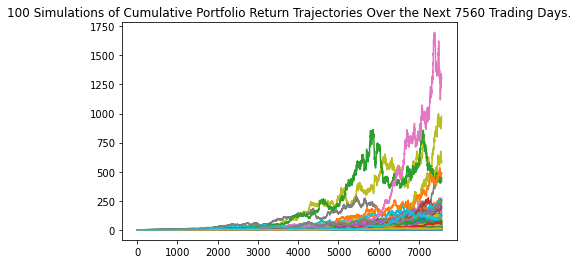

In [42]:
#plot a line plot
line_plot = MC_thirty_year.plot_simulation()

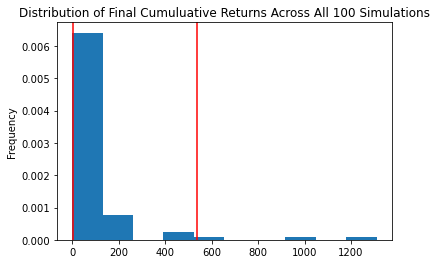

In [43]:
#plot return distrbution and CI
dist_plot = MC_thirty_year.plot_distribution()

In [44]:
#summary statistics
tbl = MC_thirty_year.summarize_cumulative_return()
print(tbl)

count            100.000000
mean              88.132021
std              185.905225
min                0.239553
25%               12.580198
50%               25.381454
75%               69.202631
max             1309.927904
95% CI Lower       2.335815
95% CI Upper     536.011282
Name: 7560, dtype: float64


In [45]:
# final analysis
int_investment = 10000

#upper and lower CI
CI_Lower = round(tbl[-2] * int_investment,2)
CI_Upper = round(tbl[-1] * int_investment,2)

#Print output
print(f"There is a 95% chance that your initial investment of {int_investment} will grow to ${CI_Lower} to ${CI_Upper} over the next 30 years.")

There is a 95% chance that your initial investment of 10000 will grow to $23358.15 to $5360112.82 over the next 30 years.
